In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("data_with_songs.csv")

# Display first few rows
df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked,song_type
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0,Dance Happy Song
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1,Dance High Energy Fast Song
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0,Sad Slow Song
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1,Dance High Energy Slow Song
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1,Dance Happy Fast Song


In [4]:
# Check for missing values in each column
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing target values (if any)
df = df.dropna(subset=["liked"])


Missing Values:
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
song_type           0
dtype: int64


In [5]:
# Remove duplicate rows
df = df.drop_duplicates()


In [6]:
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked', 'song_type'],
      dtype='object')


In [9]:
# Drop non-numeric columns
df = df.drop(columns=["song_type"])

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Define features (X) and target (y)
X = df.drop(columns=["liked"])
y = df["liked"]


Missing Values:
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [10]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of datasets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (156, 13)
Testing Set Shape: (39, 13)


In [11]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Get probabilities for ROC curve
y_proba = model.predict_proba(X_test)[:, 1]


In [13]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Model Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        20

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:
 [[18  1]
 [ 1 19]]


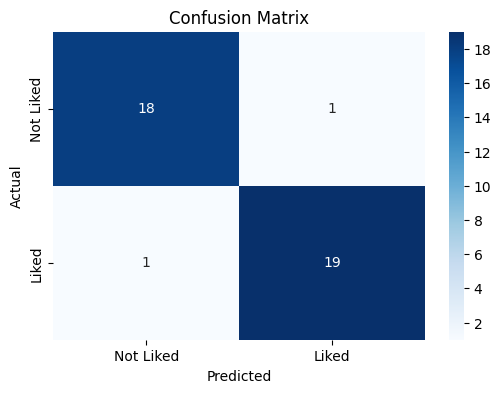

In [14]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Liked", "Liked"], yticklabels=["Not Liked", "Liked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


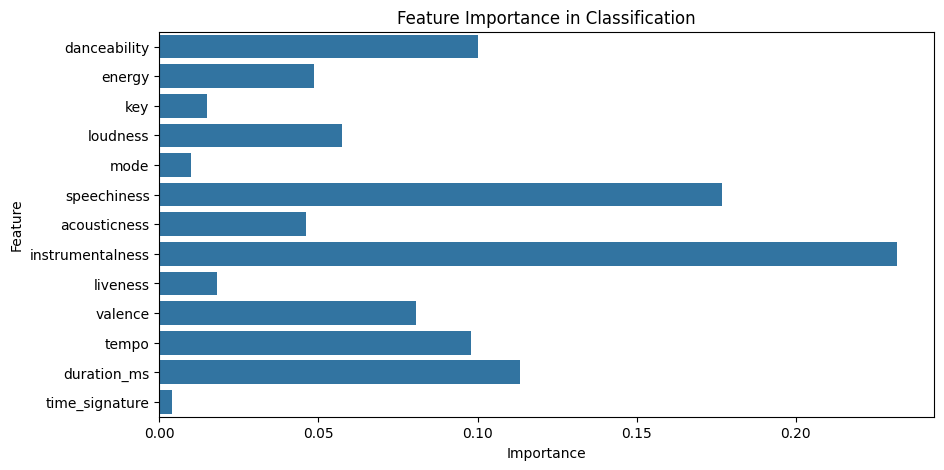

In [15]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Classification")
plt.show()


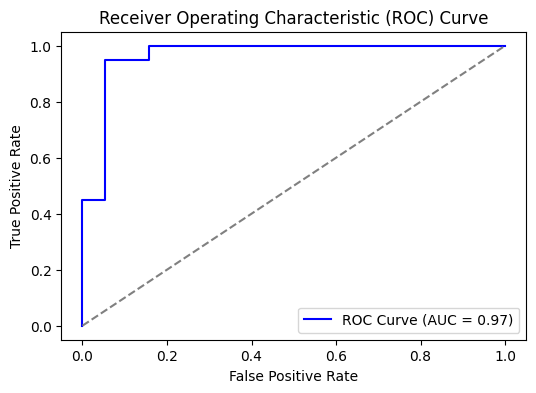

In [16]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


C:\Users\satvi\AppData\Local\Temp\ipykernel_25116\788757606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="liked", data=df, palette="viridis")


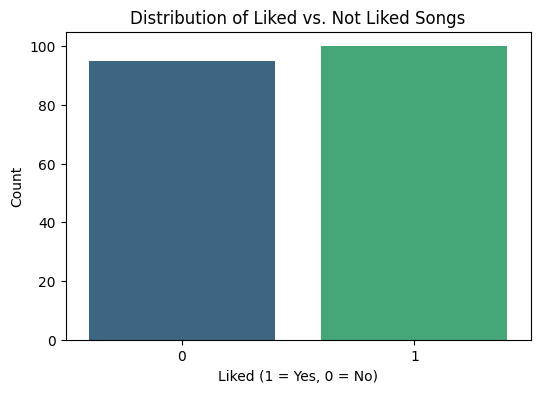

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="liked", data=df, palette="viridis")
plt.xlabel("Liked (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Distribution of Liked vs. Not Liked Songs")
plt.show()


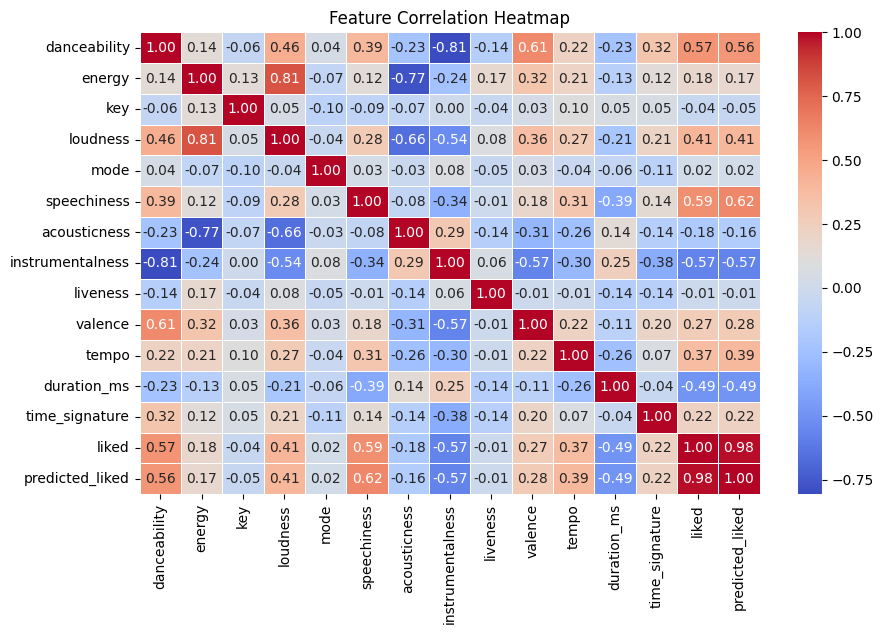

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Add predictions to the dataset (without saving)
df["predicted_liked"] = model.predict(X)  # Predict for the entire dataset

# Display first few rows with predictions
df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked,predicted_liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1,1


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [22]:
# Load dataset
df = pd.read_csv("data_with_songs.csv")

# Drop non-numeric columns except 'song_name' (keep it for reference)
X = df.drop(columns=["liked", "song_type"])  # Features
y = df["liked"]  # Target variable

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM, KNN, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"🔹 {name} Accuracy: {accuracy:.4f}")


🔹 Logistic Regression Accuracy: 0.9231
🔹 Random Forest Accuracy: 0.9487
🔹 SVM Accuracy: 0.9231
🔹 K-Nearest Neighbors Accuracy: 0.8205
🔹 Naive Bayes Accuracy: 0.8462
🔹 Decision Tree Accuracy: 0.8462


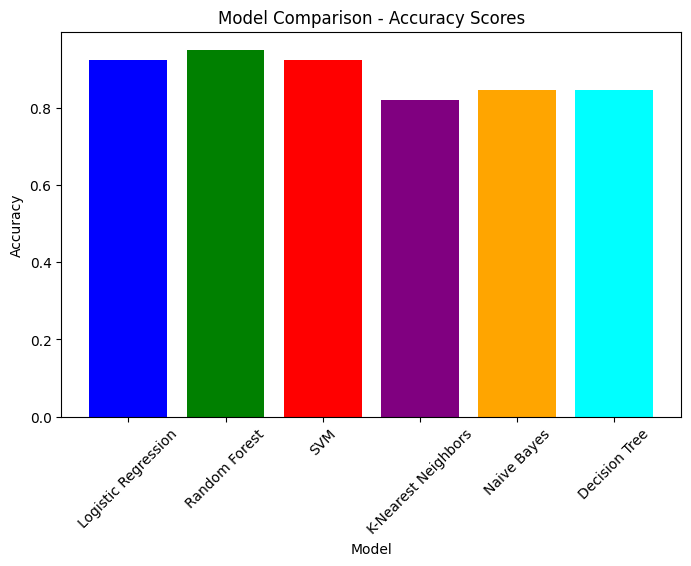

In [24]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy Scores")
plt.xticks(rotation=45)
plt.show()
